# ECE 143 Ad - Hoc Communications Network
___

In this notebook, I will be describing my steps to solve the ECE 143 individual project.

## Imports
___

In [1]:
from cTower import *
from calcCoverage import *
from plotCoverage import *
import matplotlib.patches as patches
import matplotlib.pyplot as pyplot
import time

## Example of Tower on a Grid
___

To start out, I can run my createTower method which creates a random tower within a given width and height (desired coverage footprint). Then, using matplotlib, I am able to prepare rectangles corresponding to each tower's area and position, then graph each tower and set the colors and edges to anything I like.

tower((5, 2),3,8)
Towers have the form ((x position of bottom left corner,y position of bottom left corner),width,height)


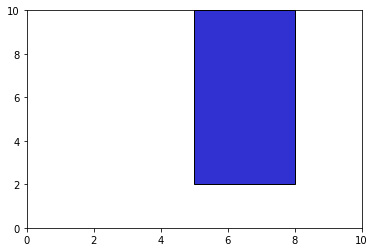

In [3]:
example = createTower(10, 10)
print example
print ("Towers have the form ((x position of bottom left corner,y position of bottom left corner),width,height)")

%matplotlib inline

graph,axis = pyplot.subplots(1)
pyplot.axis([0,10,0,10])
rect = prepRectangles([example])
axis.add_patch(rect[0])
graph.canvas.draw()


##  Question 1 - Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?
___

To begin, a user must specify their desired width and height for their coverage area, as well as how many towers they would like to place at a maximum.

Then, I will run my coverage function which will create new towers and trim towers that are covering a piece of area already covered by another tower. It will save both the original coverage area of each tower ( oldTowers ) as well as the trimmed coverage area of each tower (newTowers). If a tower is completely covered by a tower already placed, I do not count it toward the number of towers placed total.

prepRectangles will prepare the towers for graphing and assign them a color and edge color.

Finally, I will graph each of the towers, first as it was originally created, then replace it after a delay with its trimmed version so that it is clear which part of the tower was trimmed.

<IPython.core.display.Javascript object>


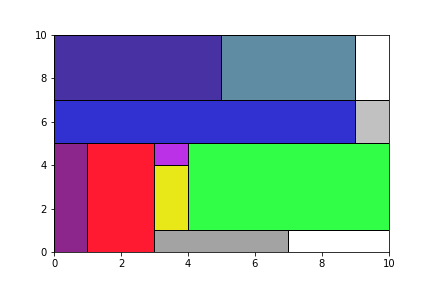

In [7]:
width = 10
height = 10
towers =  10

[newTowers, oldTowers, area] = coverage(towers, width, height)
    
newRects = prepRectangles(newTowers)
oldRects = prepRectangles(oldTowers)

%matplotlib notebook
 
graph,axis = pyplot.subplots(1)
pyplot.axis([0,width,0,height])
time.sleep(1)
axis.add_patch(newRects[0])
graph.canvas.draw()
for i in range(1,len(newRects)):
    time.sleep(0.5)
    axis.add_patch(oldRects[i])
    graph.canvas.draw()
    if newTowers[i] != oldTowers[i]:
        time.sleep(0.25)
        oldRects[i].remove()
        time.sleep(0.25)
        axis.add_patch(newRects[i])
        graph.canvas.draw()

Next, we need to determine the resulting resolved coverage. This was given to us in our function as area, which is the area of all trimmed towers added together. This is also given as the animation above, which shows the final area covered.

In [8]:
print(area)

94


## Question 2 - What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?
___

Given the area above, we can determine a ratio of the maximum area vs. the resolved coverage that we obtained.

In [9]:
maxArea = height * width
relativeCoverage =  str(area) + "/" + str(maxArea)
print(relativeCoverage)
if (area < maxArea):
    print("There are gaps, because the coverage is less than what was desired")
else:
    print("There are no gaps, because the area is completely covered by towers")

94/100
There are gaps, because the coverage is less than what was desired


## Question 3 - On average, how many communications towers are required before full coverage is obtained?
___

This question requires a different function, which I have named fullCoverage. Now instead of requiring a set amount of towers, it will run until the area is completely filled (the function will check for this after adding each tower).

First, we must specify an amount of runs, as well as a width and height to test with.
Note that too high of a coverage area or too many towers may cause the program to take a while to calculate.

In [2]:
runs = 10
width = 5
height = 5
total = 0

for _ in range(runs):  
    total = total + fullCoverage(width,height)
    
total = float(total) / runs

print(total)

5.8
